In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Extract foreign and english vocabularies
def vocab(sentence_pairs):
    foreign_words = []
    english_words = []

    for sp in sentence_pairs:
        for ew in sp[1]: 
            english_words.append(ew)
        for fw in sp[0]: 
            foreign_words.append(fw)

    english_words = sorted(list(set(english_words)), key=lambda s: s.lower()) 
    foreign_words = sorted(list(set(foreign_words)), key=lambda s: s.lower())
    # print('English vocab: ', english_words)
    # print('Foreign vocab: ', foreign_words)
    return english_words,foreign_words

In [3]:
# Vocabulary size of the english and foreign words
def vocab_size(english_words,foreign_words):
    english_vocab_size = len(english_words)
    foreign_vocab_size = len(foreign_words)
    print('english_vocab_size: ', english_vocab_size)
    print('foreign_vocab_size: ', foreign_vocab_size)
    return english_vocab_size,foreign_vocab_size

In [4]:
def init_all(t, init_val, english_words, foreign_words):
    for fw in foreign_words:
        for ew in english_words:
            tup = (ew, fw) # tuple required because dict key cannot be list
            t[tup] = init_val

In [5]:
def init_sentence_pairs(t, init_val, sentence_pairs):
    for a in range(len(sentence_pairs)):
        for d_word in sentence_pairs[a][0]:
            for e_word in sentence_pairs[a][1]:
                t[(e_word, d_word)] = init_val

In [6]:
english_vocab = []
dutch_vocab = []
all_pairs = []
new_pairs = []
lines = []
lines_for_pairs = []

counter = 0
for number_of_lines in range(500,4000,500):
    lines.append(number_of_lines)
    print("\n\n",number_of_lines)
    e_data=pd.read_csv("English_Updated.txt",sep='\n',header=None, nrows=number_of_lines)
    d_data=pd.read_csv("Dutch_Updated.txt",sep='\n',header=None, nrows=number_of_lines)

    df = pd.DataFrame(columns=['dutch','english'])

    for a in range(len(e_data)):
            df.loc[a] = d_data[0][a].split(" "),e_data[0][a].split(" ")

    del e_data
    del d_data

    sentence_pairs = df.to_numpy()
    del df
    
    english_words,foreign_words = vocab(sentence_pairs)
    english_vocab_size,foreign_vocab_size = vocab_size(english_words,foreign_words)
    english_vocab.append(english_vocab_size) 
    dutch_vocab.append(foreign_vocab_size)
    
    lines_for_pairs.append(number_of_lines)
    init_val = 1
    t = {}
    init_all(t, init_val, english_words, foreign_words)
    all_pairs.append(len(t))
    print("all_pairs:", all_pairs[counter])

    t = {}
    init_sentence_pairs(t, init_val, sentence_pairs)
    new_pairs.append(len(t))
    print("sentence_pairs:", new_pairs[counter])
    
    counter += 1

    
for number_of_lines in range(4000,20000,2000):
    lines.append(number_of_lines)
    print("\n\n",number_of_lines)
    e_data=pd.read_csv("English_Updated.txt",sep='\n',header=None, nrows=number_of_lines)
    d_data=pd.read_csv("Dutch_Updated.txt",sep='\n',header=None, nrows=number_of_lines)

    df = pd.DataFrame(columns=['dutch','english'])

    for a in range(len(e_data)):
            df.loc[a] = d_data[0][a].split(" "),e_data[0][a].split(" ")

    del e_data
    del d_data

    sentence_pairs = df.to_numpy()
    del df
    
    english_words,foreign_words = vocab(sentence_pairs)
    english_vocab_size,foreign_vocab_size = vocab_size(english_words,foreign_words)
    english_vocab.append(english_vocab_size) 
    dutch_vocab.append(foreign_vocab_size)
    
    counter += 1
    

for number_of_lines in range(20000,50000,4000):
    lines.append(number_of_lines)
    print("\n\n",number_of_lines)
    e_data=pd.read_csv("English_Updated.txt",sep='\n',header=None, nrows=number_of_lines)
    d_data=pd.read_csv("Dutch_Updated.txt",sep='\n',header=None, nrows=number_of_lines)

    df = pd.DataFrame(columns=['dutch','english'])

    for a in range(len(e_data)):
            df.loc[a] = d_data[0][a].split(" "),e_data[0][a].split(" ")

    del e_data
    del d_data

    sentence_pairs = df.to_numpy()
    del df
    
    english_words,foreign_words = vocab(sentence_pairs)
    english_vocab_size,foreign_vocab_size = vocab_size(english_words,foreign_words)
    english_vocab.append(english_vocab_size) 
    dutch_vocab.append(foreign_vocab_size)
    
    counter += 1



 500
english_vocab_size:  2394
foreign_vocab_size:  2607
all_pairs: 6241158
sentence_pairs: 199977


 1000
english_vocab_size:  3530
foreign_vocab_size:  3953
all_pairs: 13954090
sentence_pairs: 356590


 1500
english_vocab_size:  4475
foreign_vocab_size:  5086
all_pairs: 22759850
sentence_pairs: 489306


 2000
english_vocab_size:  5193
foreign_vocab_size:  6023
all_pairs: 31277439
sentence_pairs: 611823


 2500
english_vocab_size:  5906
foreign_vocab_size:  6891
all_pairs: 40698246
sentence_pairs: 720710


 3000
english_vocab_size:  6457
foreign_vocab_size:  7654
all_pairs: 49421878
sentence_pairs: 814990


 3500
english_vocab_size:  6883
foreign_vocab_size:  8262
all_pairs: 56867346
sentence_pairs: 903768


 4000
english_vocab_size:  7336
foreign_vocab_size:  8908


 6000
english_vocab_size:  9080
foreign_vocab_size:  11306


 8000
english_vocab_size:  10400
foreign_vocab_size:  13205


 10000
english_vocab_size:  11439
foreign_vocab_size:  14936


 12000
english_vocab_size:  12359

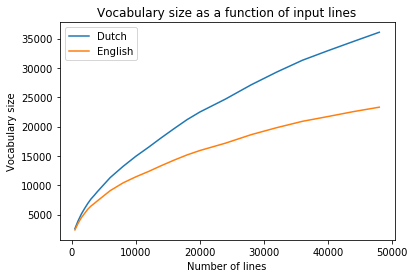

In [7]:
plt.plot(lines,dutch_vocab, label="Dutch")
plt.plot(lines,english_vocab, label="English")
plt.title("Vocabulary size as a function of input lines")
plt.xlabel("Number of lines")
plt.ylabel("Vocabulary size")
plt.legend(loc='upper left')
plt.show()

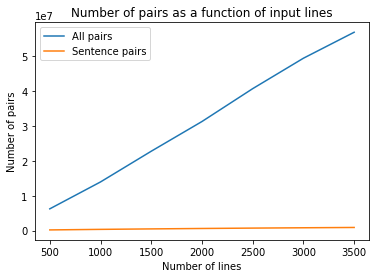

In [8]:
plt.plot(lines_for_pairs,all_pairs, label="All pairs")
plt.plot(lines_for_pairs,new_pairs, label="Sentence pairs")
plt.title("Number of pairs as a function of input lines")
plt.xlabel("Number of lines")
plt.ylabel("Number of pairs")
plt.legend(loc='upper left')
plt.show()

In [9]:
for number_of_lines in range(75000,110000,25000):
    lines.append(number_of_lines)
    print("\n\n",number_of_lines)
    e_data=pd.read_csv("English_Updated.txt",sep='\n',header=None, nrows=number_of_lines)
    d_data=pd.read_csv("Dutch_Updated.txt",sep='\n',header=None, nrows=number_of_lines)

    df = pd.DataFrame(columns=['dutch','english'])

    for a in range(len(e_data)):
            df.loc[a] = d_data[0][a].split(" "),e_data[0][a].split(" ")

    del e_data
    del d_data

    sentence_pairs = df.to_numpy()
    del df
    
    english_words,foreign_words = vocab(sentence_pairs)
    english_vocab_size,foreign_vocab_size = vocab_size(english_words,foreign_words)
    english_vocab.append(english_vocab_size) 
    dutch_vocab.append(foreign_vocab_size)
    
    counter += 1



 75000
english_vocab_size:  27871
foreign_vocab_size:  45575


 100000
english_vocab_size:  31544
foreign_vocab_size:  53205


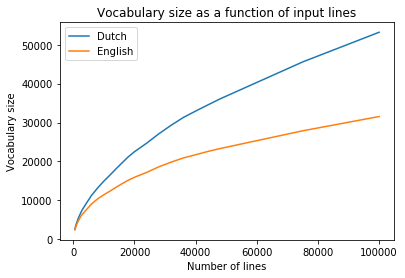

In [10]:
plt.plot(lines,dutch_vocab, label="Dutch")
plt.plot(lines,english_vocab, label="English")
plt.title("Vocabulary size as a function of input lines")
plt.xlabel("Number of lines")
plt.ylabel("Vocabulary size")
plt.legend(loc='upper left')
plt.show()